In [10]:

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn: Model Selection & Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
 

# Sklearn: Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,
                             r2_score, confusion_matrix,classification_report,)

from sklearn.preprocessing import LabelEncoder
# Sklearn: Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline



Training model: Logistic Regression
Accuracy: 0.9587
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



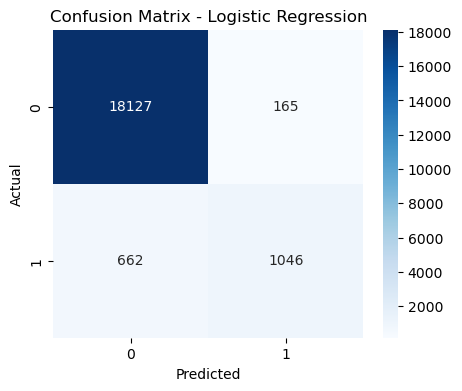


Training model: DecisionTree
Accuracy: 0.9525
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



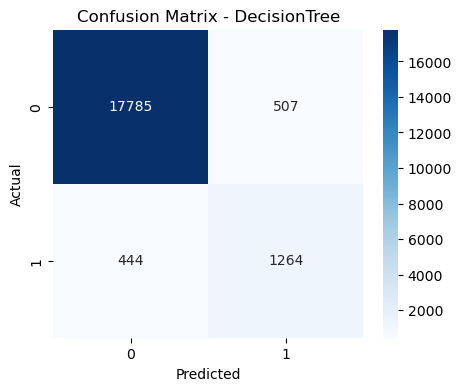


Training model: Random Forest
Accuracy: 0.9722
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



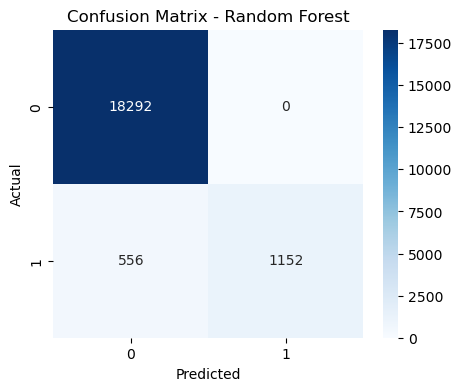


Training model: XGBoost
Accuracy: 0.9710
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



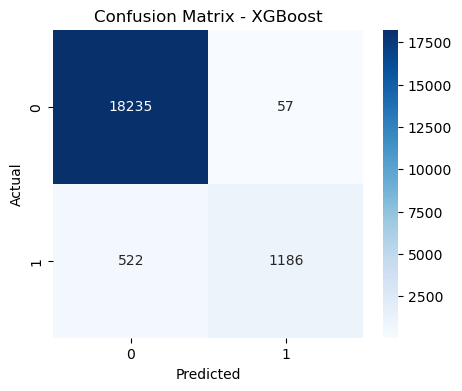

In [4]:
try:
    from xgboost import XGBClassifier
    HAS_XGBOOST = True
except:
    HAS_XGBOOST = False

def get_features(df,target_column):
    X=df.drop(columns=[target_column])
    Y=df[target_column]
    return X,Y

def build_preprocessor(X):
    numeric=X.select_dtypes(include=[np.number]).columns.tolist()
    category=X.select_dtypes(exclude=[np.number]).columns.tolist()

    num_pipeline=Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    cat_pipeline=Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", num_pipeline, numeric),
            ("cat", cat_pipeline, category)
        ]
    )
    return preprocessor

def get_models():
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "DecisionTree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(
            n_estimators=200,
            max_depth=10,
            random_state=42
        )
        
    }
    if HAS_XGBOOST:
           models["XGBoost"] = XGBClassifier(
            n_estimators=100,
            eval_metric='mlogloss',
            random_state=42
          )

    return models

def build_pipeline(preprocessor, model):
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',model)
    ])
    return pipeline

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def train_models(X,Y):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    preprocessor = build_preprocessor(X)
    models = get_models()
    for name, model in models.items():
        print("\n" + "=" * 40)
        print(f"Training model: {name}")    
        pipeline = build_pipeline(preprocessor, model)
        pipeline.fit(X_train, Y_train)
        Y_pred = pipeline.predict(X_test)
        acc = accuracy_score(Y_test, Y_pred)
        print(f"Accuracy: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(Y_test, Y_pred))
        plot_confusion_matrix(Y_test, Y_pred, name)

  

def main():
    df=pd.read_csv("diabetes_prediction_dataset.csv")

    cat_cols = df.select_dtypes(include=['object']).columns

    for col in cat_cols:
       le = LabelEncoder()
       df[col] = le.fit_transform(df[col].astype(str))

    target_column="diabetes"

    X,Y=get_features(df,target_column)
    train_models(X,Y)

if __name__ == "__main__":
    main()

In [11]:

df = pd.read_csv("diabetes_prediction_dataset.csv")   
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
       le = LabelEncoder()
       df[col] = le.fit_transform(df[col].astype(str))
X = df.drop("diabetes", axis=1)  
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

pipeline = Pipeline([
    ("scaler", StandardScaler()),      
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=3))



Classification Report:

              precision    recall  f1-score   support

           0      0.988     0.888     0.935     18300
           1      0.424     0.887     0.573      1700

    accuracy                          0.888     20000
   macro avg      0.706     0.887     0.754     20000
weighted avg      0.940     0.888     0.905     20000

